##Exercise Interpolation

In [2]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt
import random as rnd

1) Plot these four points (2,3), (3,1), (4,2), (5,2).

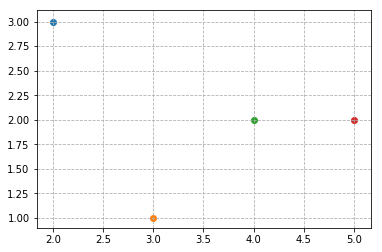

In [3]:
plt.scatter(2,3)
plt.scatter(3,1)
plt.scatter(4,2)
plt.scatter(5,2)
plt.grid(ls='--')

2) Find the polynomial of degree 3 that pass through these four points. Plot to verify.

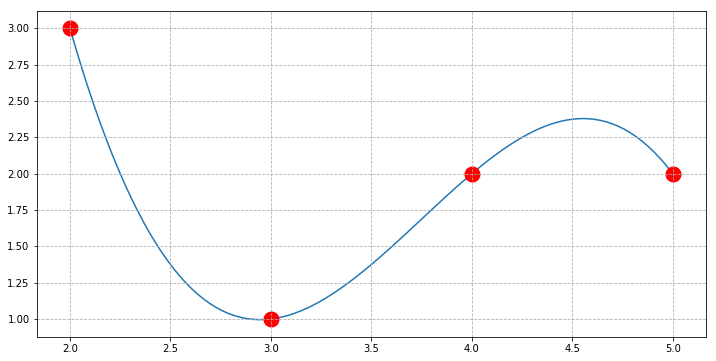

In [7]:
def g(x,n,xs):
    nom = 1;
    for i in range(len(xs)):
        if i != n :
            nom *= (x-xs[i])
    denom = 1
    for i in range(len(xs)):
        if(i != n):
            denom *= (xs[n]-xs[i])
    return nom/denom

def f(x,xs,ys):
    return sum([ys[i]*g(x,i,xs) for i in range(len(xs))])

def scatter(px,py):
    for i in range(len(px)):
        plt.scatter(px[i],py[i],lw=10,c='r',zorder=1)
        
        
def plot(xs,fx,px,py):
    plt.figure(figsize=(12,6))
    plt.plot(xs,fx,zorder=0)
    scatter(px,py)
    plt.grid(ls='--')

px = [2,3,4,5]
py = [3,1,2,2]
xs = np.linspace(2,5,100)
fx = [f(x,px,py) for x in xs]

    
plot(xs,fx,px,py)

3) Find polynomial of degree 3 that pass through these four points. Plot to verify.

(1,2) (2,0) (3,2) (7,1)

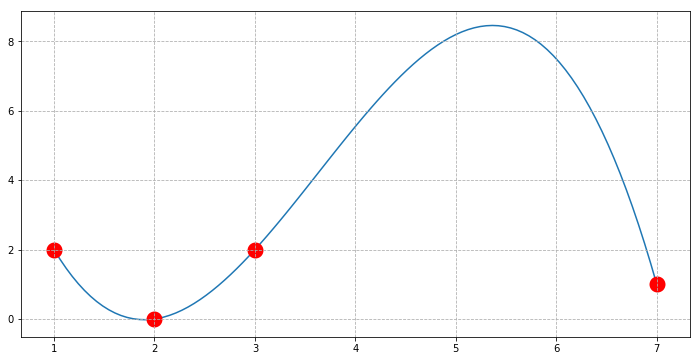

In [5]:
px = [1,2,3,7]
py = [2,0,2,1]

xs = np.linspace(1,7,100)
fx = [f(x,px,py) for x in xs]

plot(xs,fx,px,py)

4) Write a function `ledendre(x, xs, ys)` which compute the legendre polynomial given the list of x values in xs and y values in ys.

`legendre(1.5, [1,2,3,7], [2,0,2,1])`

should have the same value as the polymial you found in 3) evaluated at x=1.5.

For those of you who know functional programming try write a functor that return a polynomial.

In [6]:
def legendre(x,xs,ys):
    def g(x,n,xs):
        nom = 1;
        for i in range(len(xs)):
            if i != n :
                nom *= (x-xs[i])
        denom = 1
        for i in range(len(xs)):
            if(i != n):
                denom *= (xs[n]-xs[i])
        return nom/denom
    return sum([ys[i]*g(x,i,xs) for i in range(len(xs))])


def plot(xs,fx,px,py):
    def scatter(px,py):
        for i in range(len(px)):
            plt.scatter(px[i],py[i],lw=5,c='black',zorder=1)
    plt.figure(figsize=(12,6))
    plt.plot(xs,fx,zorder=0,label="Legendre Method")
    scatter(px,py)
    plt.grid(ls='--')

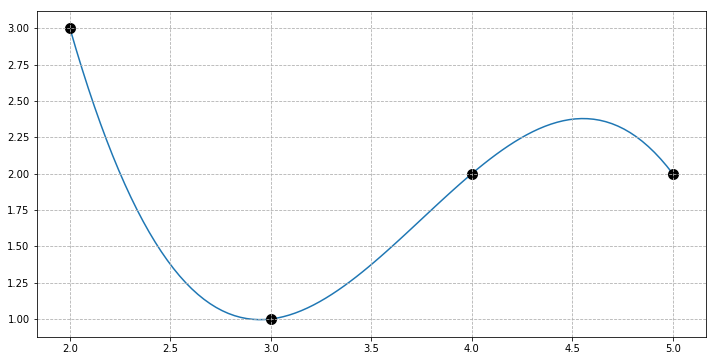

In [7]:
#Ajarn version

def legendre_generator(xs,ys):
    nterms = len(xs)
    def legendre(x):
        s=0
        for ix in range(len(xs)):
            numerator = ys[ix]
            for  inum in range(nterms):
                if inum != ix:
                    numerator *= (x-xs[inum])/(xs[ix] - xs[inum])
            s += numerator
        return s            
    return legendre

px = [2,3,4,5]
py = [3,1,2,2]
lg = legendre_generator(px,py)
xs = np.linspace(2,5,100)
fx = [lg(x) for x in xs]
plot(xs,fx,px,py)

5) Now sample 11 points  from $f(x) = \sin(x)$ for for $x\in[0, \pi]$. Plot $\sin(x)$ along with those 11 points. Make sure your $\sin(x)$ is plotted with more than 100 points

(-1, 1)

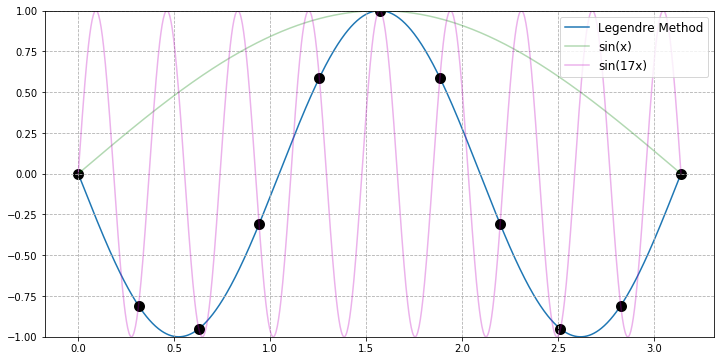

In [8]:
px = np.linspace(0,math.pi,11)
py = [math.sin(17*x) for x in px]

lg = legendre_generator(px,py)
xs = np.linspace(0,math.pi,1000)
p_x = [lg(x) for x in xs]
fx = [math.sin(x) for x in xs]

plot(xs,p_x,px,py)
plt.plot(xs,[math.sin(x) for x in xs],alpha=0.3,label="sin(x)",c='g')
plt.plot(xs,[math.sin(17*x) for x in xs],alpha=0.3,label="sin(17x)",c='m')
plt.legend(loc=1,fontsize=12)
plt.ylim(-1,1)

6) Plot legendre polynomial for these points. How similar is it to $\sin(x)$ function. Make sure your legendre is plotte with at least 100 points.

7) Now sample 11 points  from $f(x) = \sin(200x)$ for for $x\in[0, \pi]$. Plot $\sin(x)$ along with those 11 points. Note the 200. Then plot legendre polynomial for these points.

8) Does it pass through all the point? Does it look like the original function.

##Exercise Integration

0) What is $$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

In [9]:
def i_x(x):
    return x**4 / 4
    
print(i_x(3)-i_x(1))

20.0


1)Use Trapezoid Rule to calculate

$$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

Using 1 piece.

In [10]:
def trap_rule(f,a,b,n):
    edges = np.linspace(a,b,n+1)
    h = (b-a)/n
    return (sum(f(e) for e in edges) - 0.5*(f(a)+f(b)))*h

trap_rule(lambda x : x**3,1,3,1)

28.0

2)Use Trapezoid Rule to calculate

$$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

Using 100 pieces.

In [11]:
trap_rule(lambda x : x**3,1,3,100)

20.000800000000002

3) What is the bound on error for 1)?

In [12]:
8.0

8.0

4) What is the bound on error for 2)?

In [13]:
8e-4

0.0008

5) Compute the following integral
$$ \int \limits_{x=0}^{x=1} e^{-x} \sin(x^2) \; dx $$

using 100 sub divisions. This is one of those thing you can't do by hands. 

In [14]:
def f(x):
    return math.exp(-x)*math.sin(x**2)

trap_rule(f,0,1,100)

0.15091330026867267

6) If we want compute
$$ \int \limits_{x=0}^{x=1} e^{-x} \; dx $$
that is at most $10^{-6}$ away from the real answer. How many subdivisions do we need?

In [34]:
def f(x):
    return math.exp(-x)

def F(x):
    return -math.exp(-x)

real = F(1)-F(0)
print(real)

def error(f,a,b,n,ddf):
    ddf_xi = np.max(np.absolute([ddf(a),ddf(b)]))
    return (((b-a)**3) / (12* n**2)) * ddf_xi

for i in range(1,1000):
    if( error(f,0,1,i,f) < 1e-6):
        print(error(f,0,1,i,f))
        print(i)
        break

0.6321205588285577
9.97753060109e-07
289


7) Compute the integral above and make sure your answer is at most $10^-6$ away from the real answer. 

In [33]:
abs(real - trap_rule(lambda x:math.exp(-x),0,1,289))

6.307000957050946e-07